Here I'll run some test on the following databases : "lanl-comprehensive_700k.csv" and "lanl-comprehensive-unified-auth.csv".
The model training will disconsider the time column. The experiments will be the following:

 1 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive-unified-auth.csv" dropping "computer_source"
    
 2 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive-unified-auth.csv" dropping "user"
 
 3 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive_700k.csv" dropping "src_comp"
 
 4 : Experiment with one hot enconding and label enc on the database "lanl-comprehensive_700k.csv" dropping "src_user"
 
 5 : Experiment with label enconding and one-hot-enc on both datasets without dropping columns

*Isolation Forest test*

In [1]:
#!pip install -U scikit-learn

***Importing the database***

In [5]:
# only run cells below to install dependencies
#import sys
#!{sys.executable} -m pip install numpy

In [6]:
#!{sys.executable} -m pip install pandas

  Using cached pandas-1.4.1-cp310-cp310-win_amd64.whl (10.6 MB)
     -------------------------------------- 503.5/503.5 KB 1.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np

Functions to be used

In [2]:
def preparaTabela(nomeDataset, columnDrop = None, percentagem = 0.2):
    if (nomeDataset == "lanl-comprehensive-unified-auth.csv") :
        X = pd.read_csv("lanl-comprehensive-unified-auth.csv",header=None) #an m-by-n dataset with m observations
        X.rename(columns={0:'time', 1:'computer_source',2:'user',3:'computer_dest', 4:'label'}, inplace=True)
        X = X.iloc[1: , :]
        X = X.drop('time', axis = 1)
        labelsX = X.pop('label').to_numpy()
        
        if(columnDrop == "computer_source"):
            X = X.drop('computer_source', axis = 1)
        elif(columnDrop == "user"):
            X = X.drop("user", axis = 1)    
        
        return X, labelsX
            
    elif(nomeDataset == "lanl-comprehensive_700k.csv"):
        Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations
        Y.rename(columns={0:'time', 1:'src_user',2:'src_comp',3:'dst_comp', 4:'is_malicious'}, inplace=True)
        Y = Y.drop('time', axis = 1)
        Y = Y.iloc[1: , :] 
        Y = Y.sample(n=None, frac=percentagem, replace=True, weights=None, random_state=42, axis=None, ignore_index=False) ## dataset too big for my pc
        labelsY = Y.pop('is_malicious').to_numpy()
        
        if(columnDrop == "src_comp"):
            Y = Y.drop('src_comp', axis = 1)
        elif(columnDrop == "src_user"):
            Y = Y.drop("src_user", axis = 1)
        
        return Y, labelsY

*Experiment 1*

In [3]:
X1, labelsX1 = preparaTabela("lanl-comprehensive-unified-auth.csv", "computer_source")
print(X1.shape)
X1

(28953, 2)


,user,computer_dest
1,U451666,C313779
2,U451666,C313779
3,U457678,C639081
4,U457678,C639081
5,U416717,C825721
...,...,...
28949,U141270,C200079
28950,U141270,C200079
28951,U141270,C200079
28952,U141270,C200079


*Experiment 2*

In [4]:
X2, labelsX2 = preparaTabela("lanl-comprehensive-unified-auth.csv", "user")
print(X2.shape)
X2.head()

(28953, 2)


,computer_source,computer_dest
1,C288750,C313779
2,C288750,C313779
3,C206546,C639081
4,C206546,C639081
5,C206546,C825721


*Experiment 3*

In [5]:
Y1, labelsY1 = preparaTabela("lanl-comprehensive_700k.csv", "src_comp", percentagem = 0.4)
print(Y1.shape)
Y1.head()

(290061, 2)


C:\Users\caio_\AppData\Local\Temp\ipykernel_12136\4108410020.py:17: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations


,src_user,dst_comp
121959,C417$@DOM1,C625
671156,C87$@DOM1,C1065
131933,C2370$@DOM1,C1065
365839,C480$@DOM1,C625
259179,U924@DOM1,C529


*Experiment 4*

In [6]:
Y2, labelsY2 = preparaTabela("lanl-comprehensive_700k.csv", "src_user")
print(Y2.shape)
Y2.head()

(145030, 2)


C:\Users\caio_\AppData\Local\Temp\ipykernel_12136\4108410020.py:17: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations


,src_comp,dst_comp
121959,C417,C625
671156,C87,C1065
131933,C2370,C1065
365839,C480,C625
259179,C529,C529


In [7]:
count = 0
for i in labelsY1:
    if i == 1:
        count += 1
print("total of maligne samples in the dataset '700k': " + str(count))

total of maligne samples in the dataset '700k': 305


*Experiment 5*

In [8]:
Y3, labelsY3 = preparaTabela("lanl-comprehensive_700k.csv", percentagem=0.4)
print(Y3.shape)
Y3.head()

(290061, 3)


C:\Users\caio_\AppData\Local\Temp\ipykernel_12136\4108410020.py:17: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv("lanl-comprehensive_700k.csv",header=None, dtype={"time": int, "src_user": "string", "src_comp": "string","dst_comp": "string", "is_malicious": int}) #an m-by-n dataset with m observations


,src_user,src_comp,dst_comp
121959,C417$@DOM1,C417,C625
671156,C87$@DOM1,C87,C1065
131933,C2370$@DOM1,C2370,C1065
365839,C480$@DOM1,C480,C625
259179,U924@DOM1,C529,C529


In [9]:
X3, labelsX3 = preparaTabela("lanl-comprehensive-unified-auth.csv")
print(X3.shape)
X3.head()

(28953, 3)


,computer_source,user,computer_dest
1,C288750,U451666,C313779
2,C288750,U451666,C313779
3,C206546,U457678,C639081
4,C206546,U457678,C639081
5,C206546,U416717,C825721


One Hot Encoding

In [10]:
## fazer depois do label encoder
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()

In [11]:
#X = encoder.fit_transform(X2[['user', 'computer_dest']]).toarray()

In [12]:
#Y = encoder.fit_transform(Y2[['src_comp', 'dst_comp']]).toarray()

In [13]:
#print(Y2)

In [14]:
#print(X2)

*Labels Encoding*

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
def utilizaLabelEnc(dataFrame, col1, col2, col3 = None):
    df = dataFrame
    enc_1 = LabelEncoder()
    enc_2 = LabelEncoder()
    enc_1.fit(dataFrame[col1])
    enc_2.fit(dataFrame[col2])
    if(col3 != None):
        enc_3 = LabelEncoder()#mais um encoder
        enc_3.fit(dataFrame[col3])
        df[col3] = enc_3.transform(df[col3])
    df[col1] = enc_1.transform(df[col1])
    df[col2] = enc_2.transform(df[col2])
    return df

*Exp 1*

In [17]:
X1_labelEnc = utilizaLabelEnc(X1, "user", "computer_dest")
X1_labelEnc.head()

,user,computer_dest
1,825,612
2,825,612
3,835,1282
4,835,1282
5,761,1673


*Exp 2*

In [18]:
X2_labelEnc = utilizaLabelEnc(X2, "computer_source", "computer_dest")
X2_labelEnc.head()

,computer_source,computer_dest
1,394,612
2,394,612
3,252,1282
4,252,1282
5,252,1673


*Exp 3*

In [19]:
Y1_labelEnc = utilizaLabelEnc(Y1, "src_user", "dst_comp")
Y1_labelEnc.head()

,src_user,dst_comp
121959,2584,323
671156,3876,15
131933,1279,15
365839,2981,323
259179,5391,303


*Exp 4*

In [20]:
Y2_labelEnc = utilizaLabelEnc(Y2, "src_comp", "dst_comp")
Y2_labelEnc.head()

,src_comp,dst_comp
121959,2565,286
671156,3834,14
131933,1255,14
365839,2956,286
259179,3251,270


*Exp 5*

On the 700k dataset:

In [21]:
Y3_labelEnc = utilizaLabelEnc(Y3, "src_comp", "dst_comp", "src_user")
Y3_labelEnc

,src_user,src_comp,dst_comp
121959,2584,2583,323
671156,3876,3867,15
131933,1279,1265,15
365839,2981,2978,323
259179,5391,3275,303
...,...,...,...
184467,2156,70,15
651720,4878,3368,306
304210,2410,3587,322
145583,5213,754,85


**Divisão Experimento de Treino/Teste:**

In [22]:
def printLabels(array, division, inverted = False):
    total1 = 0
    if(not inverted):
        for i in array:
            if i == 1 and i <= division: 
                total1 += 1
    else:
        for i in array:
            if i == 1 and i >= division: 
                total1 += 1
    
    print("total of labels 1 in the training set: " + str(total1))

In [23]:
import math

def divideDatabase(arrayInput, percentagem = 0.4, labels = None, invertido = False):
    tamanhoCorte = math.floor(np.shape(arrayInput)[0] * percentagem)
    print(tamanhoCorte)
    X_train = arrayInput[:tamanhoCorte]
    X_test = arrayInput[tamanhoCorte:]
    
    if(invertido):
        placeholder = X_train
        X_train = X_test
        X_test = placeholder
    
    ## só pra garantir que não há nenhuma anomialia no treino
    if labels is not None:
        if(not invertido):
            printLabels(X_train, tamanhoCorte)
            return X_train, X_test, labels[tamanhoCorte:]     # returning labels for metrics after testing
        else:
            printLabels(X_train, tamanhoCorte, inverted = True)
            return X_train, X_test, labels[:tamanhoCorte]
        
    return X_train, X_test

Exp 1

In [24]:
X_train1, X_test1, labelsX1_new = divideDatabase(X1_labelEnc, labels = labelsX1, percentagem = 0.7) #divide the base and getting labels for test-set

20267
total of labels 1 in the training set: 0


Exp 2

In [25]:
X_train2, X_test2, labelsX2_new = divideDatabase(X2_labelEnc, labels = labelsX2)

11581
total of labels 1 in the training set: 0


Exp 3

In [26]:
Y_train1, Y_test1, labelsY1_new = divideDatabase(Y1_labelEnc, labels = labelsY1, percentagem = 0.6, invertido = True) #taking final 40% portion for training 

174036
total of labels 1 in the training set: 0


Exp 4

In [27]:
Y_train2, Y_test2, labelsY2_new = divideDatabase(Y2_labelEnc, labels = labelsY2, percentagem = 0.6, invertido = True)

87018
total of labels 1 in the training set: 0


Exp 5

In [28]:
Y_train3, Y_test3, labelsY3_new = divideDatabase(Y3_labelEnc, labels = labelsY3, percentagem = 0.6, invertido = True)

174036
total of labels 1 in the training set: 0


**Resultados**

In [29]:
from matplotlib import pyplot as plt

def plotaGrafico(arrayInput, numeroExp, tipoEnc):
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    possiveis = [1,-1] # because it's an isolation forest
    plt.bar(possiveis, arrayInput)
    plt.xlabel("labels")
    plt.ylabel("número de instâncias")
    plt.title("Isolation Forest com "+ tipoEnc + " Encoding Exp " + str(numeroExp))
    plt.show()
    
def pegaLabels(arrayInput):
    tamanho = len(arrayInput)
    menosUm = 0
    ums = 0
    for i in range(0, tamanho):
        if arrayInput[i] == -1:
            menosUm += 1
        if arrayInput[i] == 1:
            ums += 1
    return [ums, menosUm]

**Isolation Forest with label encoding**

In [30]:
from sklearn.ensemble import IsolationForest

Exp 1

In [31]:
modelo1 = IsolationForest(random_state=0)
modelo1.fit(X_train1)

IsolationForest(random_state=0)

In [32]:
predicts1 = modelo1.predict(X_test1)

Exp 2

In [33]:
modelo2 = IsolationForest(random_state=0)
modelo2.fit(X_train2)

IsolationForest(random_state=0)

In [34]:
predicts2 = modelo2.predict(X_test2)

Exp 3

In [35]:
modelo3 = IsolationForest(random_state=0)
modelo3.fit(Y_train1)

IsolationForest(random_state=0)

In [36]:
predicts3 = modelo3.predict(Y_test1)

Exp 4

In [37]:
modelo4 = IsolationForest(random_state=0)
modelo4.fit(Y_train2)

IsolationForest(random_state=0)

In [38]:
predicts4 = modelo4.predict(Y_test2)

Exp 5

In [39]:
modelo5 = IsolationForest(random_state=0)
modelo5.fit(Y_train3)

IsolationForest(random_state=0)

In [40]:
predicts5 = modelo5.predict(Y_test3)

*Isolation Forest with one hot encoding*

In [41]:
from sklearn.ensemble import IsolationForest

In [42]:
##fazer depois

*Plotting results*

In [43]:
## to install dependencies
#import sys
#!{sys.executable} -m pip install matplotlib

*Plotting results from experiment 1*

In [44]:
labelsPrint = pegaLabels(predicts1)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 2952 \ -1 in predictions: 5734


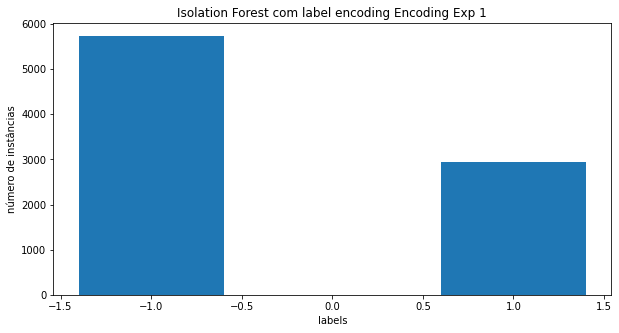

In [45]:
plotaGrafico(labelsPrint, "1", "label encoding")

*Plotting results from experiment 2*

In [46]:
labelsPrint = pegaLabels(predicts2)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 6958 \ -1 in predictions: 10414


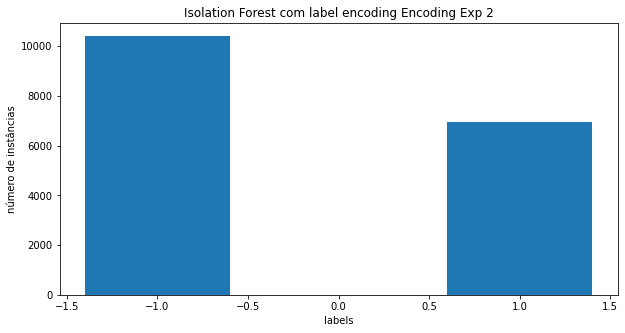

In [47]:
plotaGrafico(labelsPrint, "2", "label encoding")

*Plotting results from experiment 3*

In [48]:
labelsPrint = pegaLabels(predicts3)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 122142 \ -1 in predictions: 51894


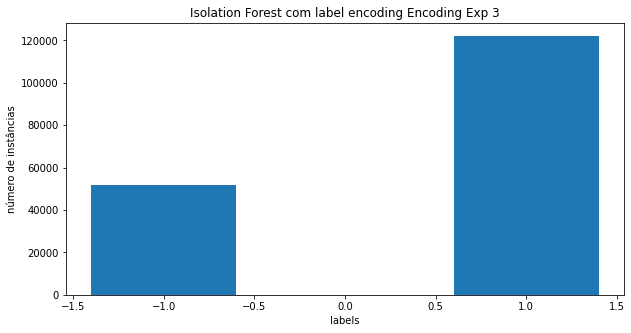

In [49]:
plotaGrafico(labelsPrint, "3", "label encoding")

*Plotting results from experiment 4*

In [50]:
labelsPrint = pegaLabels(predicts4)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1])) 

1 in predictions: 56424 \ -1 in predictions: 30594


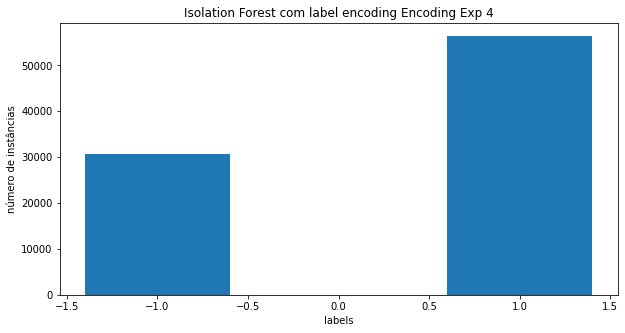

In [51]:
plotaGrafico(labelsPrint, "4", "label encoding")

*Plotting results from experiment 5*

In [52]:
labelsPrint = pegaLabels(predicts5)
print("1 in predictions: " + str(labelsPrint[0]) + " \ -1 in predictions: " + str(labelsPrint[1]))

1 in predictions: 118943 \ -1 in predictions: 55093


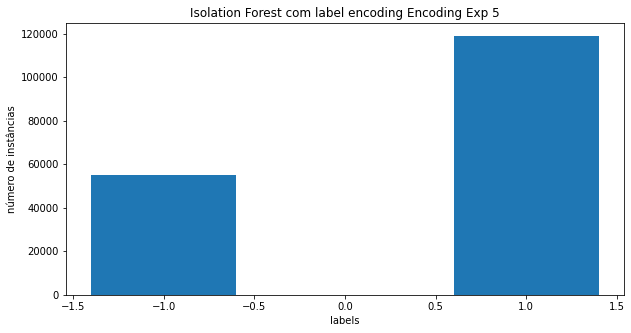

In [53]:
plotaGrafico(labelsPrint, "5", "label encoding")

**Métricas**

In [54]:
from sklearn.metrics import f1_score

Exp 1

In [55]:
labelsX1_new = labelsX1_new.astype(int)
f1_score(labelsX1_new, predicts1, average='macro')

0.04666666666666667

Exp 2

In [56]:
labelsX2_new = labelsX2_new.astype(int)
f1_score(labelsX2_new, predicts2, average='macro')

0.0

Exp 3

In [57]:
labelsY1_new = labelsY1_new.astype(int)
f1_score(labelsY1_new, predicts3, average='macro')

5.4504526600934205e-06

Exp 4

In [58]:
labelsY2_new = labelsY2_new.astype(int)
f1_score(labelsY2_new, predicts4, average='macro')

0.0

Exp 5

In [59]:
labelsY3_new = labelsY3_new.astype(int)
f1_score(labelsY3_new, predicts5, average='macro')

0.0